# NLP And Word Vectorization

In [87]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alexandercheng/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [78]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize

In [79]:
np.random.seed(0)

In [80]:
filenames = ['song' + str(i) + '.txt' for i in range(1, 21)]
filenames

['song1.txt',
 'song2.txt',
 'song3.txt',
 'song4.txt',
 'song5.txt',
 'song6.txt',
 'song7.txt',
 'song8.txt',
 'song9.txt',
 'song10.txt',
 'song11.txt',
 'song12.txt',
 'song13.txt',
 'song14.txt',
 'song15.txt',
 'song16.txt',
 'song17.txt',
 'song18.txt',
 'song19.txt',
 'song20.txt']

In [81]:
with open('data/song11.txt') as f:
    test_song = f.readlines()

In [82]:
# new_song = []
# new_song_2 = []

# for line in test_song:
#     new_song.append(
#         line.replace(',','')
#         .replace('\n','')
#         .replace('!','')
#         .replace('?','')
#         .replace('.','')
#         .replace("'",""))

# import re 
# for line in new_song:
#     new_song_2.append(re.sub("[\(\[].*?[\)\]]", "", line))

# while("" in new_song_2): 
#     new_song_2.remove("")

In [83]:
def clean_song(song):
    cleaned_song = []
    for line in song:
        if not '[' in line and  not ']' in line:
            for symbol in ",.?!''\n":
                line = line.replace(symbol, '').lower()
            cleaned_song.append(line)

    return cleaned_song

song_without_brackets = clean_song(test_song)
song_without_brackets

['love lets talk about love',
 'is it anything and everything you hoped for',
 'or do the feeling haunt you',
 'i know the feeling haunt you',
 'this may be the night that my dreams might let me know',
 'all the stars approach you all the stars approach you all the stars approach you',
 'this may be the night that my dreams might let me know',
 'all the stars are closer all the stars are closer all the stars are closer',
 'tell me what you gon do to me',
 'confrontation aint nothin new to me',
 'you can bring a bullet bring a sword bring a morgue',
 'but you cant bring the truth to me',
 'fuck you and all your expectations',
 'i dont even want your congratulations',
 'i recognize your false confidence',
 'and calculated promises all in your conversation',
 'i hate people that feel entitled',
 'look at me crazy cause i aint invite you',
 'oh you important',
 'you the moral to the story you endorsin',
 'motherfucker i dont even like you',
 'corrupt a mans heart with a gift',
 'thats how 

In [88]:
def tokenize(song):
    joined_song = ' '.join(song)
    tokenized_song = word_tokenize(joined_song)
    return tokenized_song

tokenized_test_song = tokenize(song_without_brackets)
tokenized_test_song[:10]

['love',
 'lets',
 'talk',
 'about',
 'love',
 'is',
 'it',
 'anything',
 'and',
 'everything']

In [89]:
def count_vectorize(song, vocab=None):
    if vocab:
        unique_words = vocab
    else:
        unique_words = list(set(song))
    
    song_dict = {i:0 for i in unique_words}
    
    for word in song:
        song_dict[word] += 1
    
    return song_dict

test_vectorized = count_vectorize(tokenized_test_song)
print(test_vectorized)

{'cant': 1, 'get': 2, 'game': 1, 'youre': 1, 'calculated': 1, 'important': 1, 'endorsin': 1, 'about': 3, 'talkin': 1, 'approach': 9, 'crazy': 1, 'in': 2, 'oh': 1, 'sword': 1, 'confidence': 1, 'stay': 1, 'ever': 1, 'is': 3, 'better': 1, 'covered': 1, 'this': 6, 'gon': 1, 'talk': 3, 'invite': 1, 'you': 34, 'did': 1, 'for': 7, 'realest': 1, 'hours': 1, 'look': 1, 'all': 22, 'on': 1, 'dreams': 6, 'like': 6, 'bring': 4, 'nothin': 1, 'involved': 1, 'moral': 1, 'winnin': 1, 'another': 2, 'but': 1, 'reason': 3, 'let': 6, 'tell': 1, 'recognize': 1, 'gift': 1, 'good': 1, 'find': 1, 'prayin': 1, 'life': 2, 'of': 1, 'to': 6, 'aint': 4, 'haunt': 6, 'lets': 3, 'new': 1, 'were': 1, 'out': 2, 'night': 6, 'nobody': 1, 'cryin': 1, 'everything': 3, 'can': 1, 'bullet': 1, 'rebound': 1, 'if': 3, 'false': 1, 'skin': 1, 'got': 3, 'motherfucker': 1, 'congratulations': 1, 'dealin': 1, 'small': 1, 'what': 1, 'promises': 1, 'just': 2, 'credit': 1, 'truth': 1, 'be': 6, 'your': 5, 'want': 2, 'love': 6, 'the': 38, 

In [90]:
def term_frequency(BoW_dict):
    total_word_count = sum(BoW_dict.values())
    
    for ind, val in BoW_dict.items():
        BoW_dict[ind] = val/ total_word_count
    
    return BoW_dict

test = term_frequency(test_vectorized)
print(list(test)[10:20])

['crazy', 'in', 'oh', 'sword', 'confidence', 'stay', 'ever', 'is', 'better', 'covered']


In [91]:
def inverse_document_frequency(list_of_dicts):
    vocab_set = set()
    # Iterate through list of dfs and add index to vocab_set
    for d in list_of_dicts:
        for word in d.keys():
            vocab_set.add(word)
    
    # Once vocab set is complete, create an empty dictionary with a key for each word and value of 0.
    full_vocab_dict = {i:0 for i in vocab_set}
    
    # Loop through each word in full_vocab_dict
    for word, val in full_vocab_dict.items():
        docs = 0
        
        # Loop through list of dicts.  Each time a dictionary contains the word, increment docs by 1
        for d in list_of_dicts:
            if word in d:
                docs += 1
        
        # Now that we know denominator for equation, compute and set IDF value for word
        
        full_vocab_dict[word] = np.log((len(list_of_dicts)/ float(docs)))
    
    return full_vocab_dict

In [92]:
def tf_idf(list_of_dicts):
    # Create empty dictionary containing full vocabulary of entire corpus
    doc_tf_idf = {}
    idf = inverse_document_frequency(list_of_dicts)
    full_vocab_list = {i:0 for i in list(idf.keys())}
    
    # Create tf-idf list of dictionaries, containing a dictionary that will be updated for each document
    tf_idf_list_of_dicts = []
    
    # Now, compute tf and then use this to compute and set tf-idf values for each document
    for doc in list_of_dicts:
        doc_tf = term_frequency(doc)
        for word in doc_tf:
            doc_tf_idf[word] = doc_tf[word] * idf[word]
        tf_idf_list_of_dicts.append(doc_tf_idf)
    
    return tf_idf_list_of_dicts

In [93]:
def main(filenames):
    # Iterate through list of filenames and read each in
    count_vectorized_all_documents = []
    for file in filenames:
        with open('data/' + file) as f:
            raw_data = f.readlines()
        # Clean and tokenize raw text
        cleaned = clean_song(raw_data)
        tokenized = tokenize(cleaned)
        
        # Get count vectorized representation and store in count_vectorized_all_documents  
        count_vectorized_document = count_vectorize(tokenized)
        count_vectorized_all_documents.append(count_vectorized_document)
    
    # Now that we have a list of BoW respresentations of each song, create a tf-idf representation of everything
    tf_idf_all_docs = tf_idf(count_vectorized_all_documents)
    
    return tf_idf_all_docs

tf_idf_all_docs = main(filenames)
print(list(tf_idf_all_docs[0])[:10])

['wild', 'his', 'miracle', 'occurred', 'ride', 'silver', 'words', 'about', 'in', 'oh']


In [94]:
num_dims = len(tf_idf_all_docs[0])
print("Number of Dimensions: {}".format(num_dims))

Number of Dimensions: 1344


In [95]:
tf_idf_vals_list = []

for i in tf_idf_all_docs:
    tf_idf_vals_list.append(list(i.values()))
    
tf_idf_vals_list[0][:10]

[0.004366214004340349,
 0.0021831070021701743,
 0.009133330102298753,
 0.009133330102298753,
 0.004754686678911983,
 0.009133330102298753,
 0.018266660204597506,
 0.0022716468006149736,
 0.0010562457710057778,
 0.05284081645524247]

In [96]:
t_sne_object_3d = TSNE(n_components=3)
transformed_data_3d = t_sne_object_3d.fit_transform(tf_idf_vals_list)
transformed_data_3d

array([[ -85.04439  ,  -12.42539  ,  160.53555  ],
       [  -3.4193013, -217.31935  ,   23.678131 ],
       [-181.40318  ,   37.18949  , -279.00134  ],
       [-168.894    ,  165.66945  ,   74.69088  ],
       [ 174.79863  ,  -41.690086 ,  301.93756  ],
       [  38.269165 ,  151.16583  ,   93.36936  ],
       [  31.328133 , -244.56982  , -167.79346  ],
       [  27.850698 ,   95.67248  ,  277.84744  ],
       [-125.99564  ,   96.77036  , -110.62522  ],
       [ 250.55006  ,  192.88551  , -168.65764  ],
       [-146.47461  , -198.77888  ,  159.63432  ],
       [ 146.62701  ,   29.345417 , -164.25223  ],
       [ 192.62463  , -140.5079   ,  -58.02724  ],
       [ 174.86421  ,  246.83163  ,   14.580853 ],
       [  19.869684 ,  211.12953  , -123.161224 ],
       [-216.70706  ,  -50.75892  ,    5.941306 ],
       [-107.28444  , -112.47715  , -158.13704  ],
       [ 247.58127  ,   34.86669  ,   84.8679   ],
       [  21.53436  ,   -9.539048 ,  -21.645472 ],
       [ 107.66281  , -111.0146

In [97]:
t_sne_object_2d = TSNE(n_components=2)
transformed_data_2d = t_sne_object_2d.fit_transform(tf_idf_vals_list)
transformed_data_2d

array([[ -57.13      ,  -82.44527   ],
       [-149.95668   , -100.78645   ],
       [  17.649107  ,  127.99021   ],
       [-136.68973   ,   99.35129   ],
       [ 211.75693   ,   81.607994  ],
       [ 197.99387   ,  -44.276165  ],
       [ 135.04065   ,   29.907883  ],
       [  55.82382   ,  212.21283   ],
       [ -67.15371   ,  175.84656   ],
       [ -93.41145   ,   -1.3688639 ],
       [  -0.96264917,  -14.616862  ],
       [ -57.00879   , -177.24257   ],
       [-185.9646    ,    5.108982  ],
       [  87.43467   ,  -41.514145  ],
       [ -43.565823  ,   67.657135  ],
       [  53.59356   , -193.05151   ],
       [  29.162214  , -103.39789   ],
       [  51.815746  ,   49.444122  ],
       [ 118.36375   ,  128.68997   ],
       [ 136.48239   , -126.846825  ]], dtype=float32)

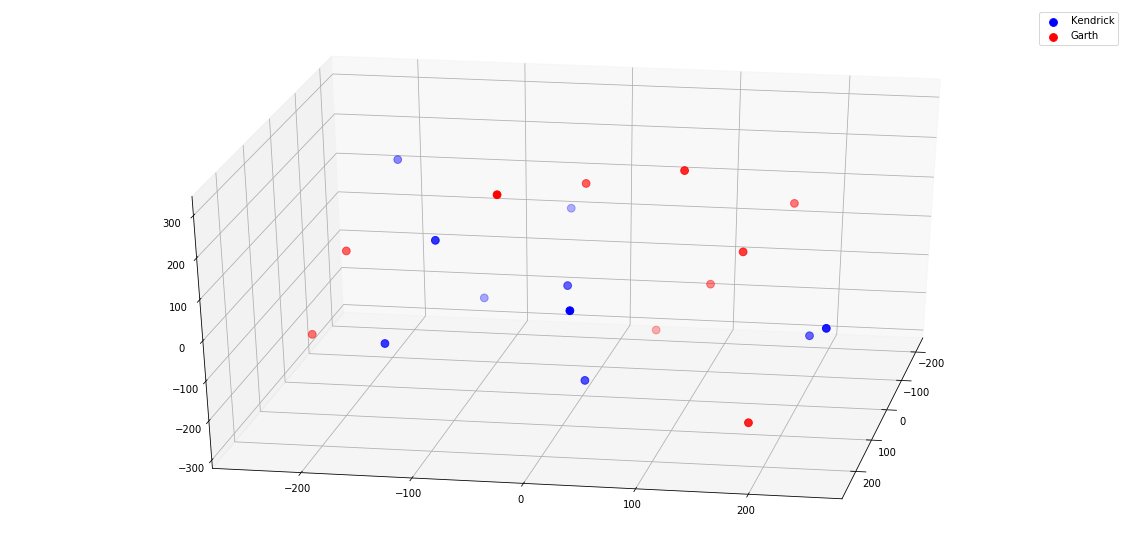

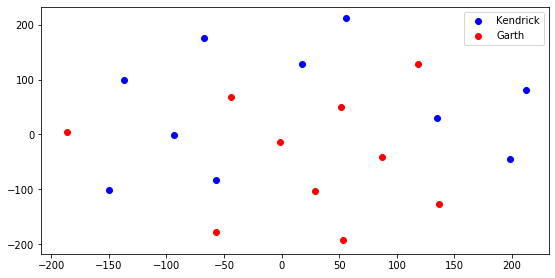

In [98]:
kendrick_3d = transformed_data_3d[10:]
k3_x = [i[0] for i in kendrick_3d]
k3_y = [i[1] for i in kendrick_3d]
k3_z = [i[2] for i in kendrick_3d]

garth_3d = transformed_data_3d[:10]
g3_x = [i[0] for i in garth_3d]
g3_y = [i[1] for i in garth_3d]
g3_z = [i[2] for i in garth_3d]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(k3_x, k3_y, k3_z, c='b', s=60, label='Kendrick')
ax.scatter(g3_x, g3_y, g3_z, c='red', s=60, label='Garth')
ax.view_init(30, 10)
ax.legend()
plt.show()

kendrick_2d = transformed_data_2d[:10]
k2_x = [i[0] for i in kendrick_2d]
k2_y = [i[1] for i in kendrick_2d]

garth_2d = transformed_data_2d[10:]
g2_x = [i[0] for i in garth_2d]
g2_y = [i[1] for i in garth_2d]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(222)
ax.scatter(k2_x, k2_y, c='b', label='Kendrick')
ax.scatter(g2_x, g2_y, c='red', label='Garth')
ax.legend()
plt.show()

**Observations**

- Both graphs show a basic trend among the red and blue dots, although the 3-dimensional graph is more informative than the 2-dimensional graph.  
- We see a separation between the two artists because they both have words that they use, but the other artist does not.  
- The words in each song that are common to both are reduced to very small numbers or to 0, because of the log operation in the IDF function.  This means that the elements of each song vector with the highest values will be the ones that have words that are unique to that specific document, or at least are rarely used in others.

In [ ]:
test_vectorized = count_vectorize(tokenized_test_song)